In [1]:
import time
#Ignore the next statement -- it is just to estimate how long the exercise takes
start = time.perf_counter()

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, learning_curve, validation_curve, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [4]:
np.random.seed(903967645)

In [5]:
default_payment_dataset = pd.read_csv('../data/default_of_credit_card_clients.csv', header=1)
print(default_payment_dataset.info())
default_payment_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# no null data
print(default_payment_dataset.shape)
default_payment_dataset.isna().any().any()

(30000, 25)


False

In [7]:
print(default_payment_dataset.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [8]:
# Separate features and target
train_X = default_payment_dataset.drop(columns=['ID', 'default payment next month'])
train_y = default_payment_dataset['default payment next month']

# Normalize the feature data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(train_X)

# Convert back to DataFrame
train_X = pd.DataFrame(X_scaled, columns=train_X.columns)

In [9]:
%%time
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_X, train_y):
    strat_train_set = train_X.iloc[train_index]
    strat_test_set = train_X.iloc[test_index]
    strat_train_labels = train_y.iloc[train_index]
    strat_test_labels = train_y.iloc[test_index]

train_X = strat_train_set
test_X = strat_test_set
train_y = strat_train_labels
test_y = strat_test_labels

CPU times: user 6.41 ms, sys: 1.71 ms, total: 8.12 ms
Wall time: 7.24 ms


In [10]:
%%time
# SVM Classifier
svm = SVC(C= 1000, gamma='auto', kernel='poly', class_weight='balanced')

svm.fit(train_X, train_y)
print(svm.get_params())

{'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
CPU times: user 10.4 s, sys: 108 ms, total: 10.5 s
Wall time: 10.6 s


In [11]:
print(svm.classes_)
print("Support Vectors Indices:", svm.support_)
print("Support Vectors:", svm.support_vectors_)
print("Number of Support Vectors for Each Class:", svm.n_support_)
print("Coefficients of Support Vectors in Decision Function:", svm.dual_coef_)

# The following attribute is only available if the kernel is linear
if svm.kernel == 'linear':
    print("Weights assigned to the features:", svm.coef_)

[0 1]
Support Vectors Indices: [    0     1     2 ... 23990 23992 23995]
Support Vectors: [[1.51515152e-01 1.00000000e+00 3.33333333e-01 ... 9.82286634e-03
  2.88374296e-02 1.15384761e-02]
 [1.41414141e-01 1.00000000e+00 1.66666667e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33333333e-01 ... 4.73429952e-04
  7.15074473e-04 1.89155346e-03]
 ...
 [5.05050505e-02 0.00000000e+00 1.66666667e-01 ... 0.00000000e+00
  2.81340776e-03 4.29193479e-03]
 [4.84848485e-01 0.00000000e+00 1.66666667e-01 ... 0.00000000e+00
  2.64929231e-04 0.00000000e+00]
 [9.09090909e-02 1.00000000e+00 3.33333333e-01 ... 5.47504026e-03
  8.30189741e-03 7.36570916e-03]]
Number of Support Vectors for Each Class: [13396  3811]
Coefficients of Support Vectors in Decision Function: [[-642.02022364 -642.02022364 -642.02022364 ... 2260.31267659
  2260.31267659 2260.31267659]]


In [12]:
%%time
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

# Fit the model on the resampled data
svm.fit(train_X_resampled, train_y_resampled)

# Evaluate on the original training data
train_predictions = svm.predict(train_X)
train_accuracy = accuracy_score(train_y, train_predictions)
train_roc_auc = roc_auc_score(train_y, train_predictions)
train_precision = precision_score(train_y, train_predictions, zero_division=1)
train_recall = recall_score(train_y, train_predictions)
train_f1 = f1_score(train_y, train_predictions)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC Score:", train_roc_auc)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
train_report = classification_report(train_y, train_predictions)
print(train_report)

# Write to a text file
with open('../results/credit-svm/training_metrics_report.txt', 'w') as file:
    file.write("Training Accuracy: " + str(train_accuracy) + "\n")
    file.write("Training ROC AUC Score: " + str(train_roc_auc) + "\n")
    file.write("Training Precision: " + str(train_precision) + "\n")
    file.write("Training Recall: " + str(train_recall) + "\n")
    file.write("Training F1 Score: " + str(train_f1) + "\n")
    file.write("\nClassification Report:\n")
    file.write(train_report + "\n")

Training Accuracy: 0.7882083333333333
Training ROC AUC Score: 0.6992293520101411
Training Precision: 0.520530523255814
Training Recall: 0.539649651535129
Training F1 Score: 0.5299176916674373
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18691
           1       0.52      0.54      0.53      5309

    accuracy                           0.79     24000
   macro avg       0.69      0.70      0.70     24000
weighted avg       0.79      0.79      0.79     24000

CPU times: user 28.9 s, sys: 2.13 s, total: 31.1 s
Wall time: 28.7 s


In [13]:
%%time
# Evaluate on testing data
test_predictions = svm.predict(test_X)
test_accuracy = accuracy_score(test_y, test_predictions)
test_roc_auc = roc_auc_score(test_y, test_predictions)
test_precision = precision_score(test_y, test_predictions)
test_recall = recall_score(test_y, test_predictions)
test_f1 = f1_score(test_y, test_predictions)

print("Testing Accuracy:", test_accuracy)
print("Testing ROC AUC Score:", test_roc_auc)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)
test_report = classification_report(test_y, test_predictions)
print(test_report)

# Write to a text file
with open('../results/credit-svm/testing_metrics_report.txt', 'w') as file:
    file.write("Testing Accuracy: " + str(test_accuracy) + "\n")
    file.write("Testing ROC AUC Score: " + str(test_roc_auc) + "\n")
    file.write("Testing Precision: " + str(test_precision) + "\n")
    file.write("Testing Recall: " + str(test_recall) + "\n")
    file.write("Testing F1 Score: " + str(test_f1) + "\n")
    file.write("\nClassification Report:\n")
    file.write(test_report + "\n")

Testing Accuracy: 0.7826666666666666
Testing ROC AUC Score: 0.6859195774407357
Testing Precision: 0.5086013462976814
Testing Recall: 0.5124340617935192
Testing F1 Score: 0.5105105105105106
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.51      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000

CPU times: user 2.01 s, sys: 6.27 ms, total: 2.01 s
Wall time: 2.03 s


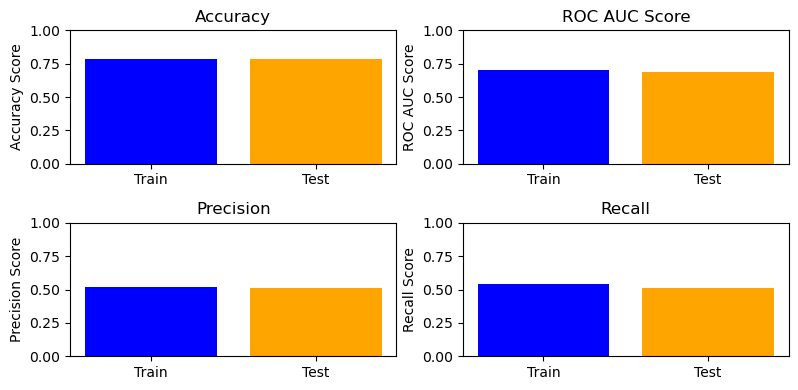

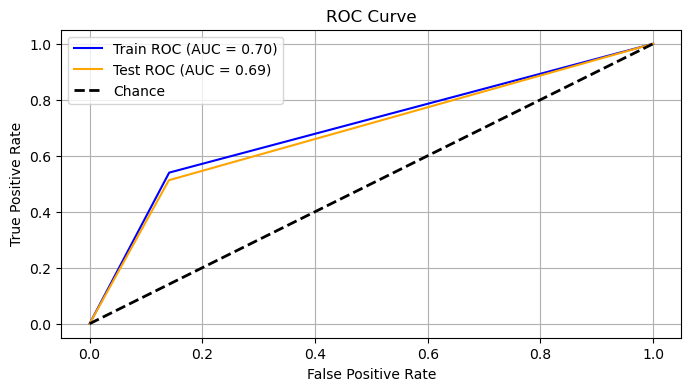

CPU times: user 830 ms, sys: 16.4 ms, total: 846 ms
Wall time: 307 ms


In [14]:
%%time
fig, ax = plt.subplots(2, 2, figsize=(8, 4))

# Accuracy
ax[0, 0].bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylim([0, 1])
ax[0, 0].set_ylabel('Accuracy Score')

# ROC AUC Score
ax[0, 1].bar(['Train', 'Test'], [train_roc_auc, test_roc_auc], color=['blue', 'orange'])
ax[0, 1].set_title('ROC AUC Score')
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_ylabel('ROC AUC Score')

# Precision
ax[1, 0].bar(['Train', 'Test'], [train_precision, test_precision], color=['blue', 'orange'])
ax[1, 0].set_title('Precision')
ax[1, 0].set_ylim([0, 1])
ax[1, 0].set_ylabel('Precision Score')

# Recall
ax[1, 1].bar(['Train', 'Test'], [train_recall, test_recall], color=['blue', 'orange'])
ax[1, 1].set_title('Recall')
ax[1, 1].set_ylim([0, 1])
ax[1, 1].set_ylabel('Recall Score')

plt.tight_layout()
fig.savefig('../images/credit-svm/metrics-comparison.png')
plt.show()

# Plotting  ROC Curves
train_fpr, train_tpr, _ = roc_curve(train_y, train_predictions)
test_fpr, test_tpr, _ = roc_curve(test_y, test_predictions)

plt.figure(figsize=(8, 4))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {auc(train_fpr, train_tpr):.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {auc(test_fpr, test_tpr):.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig('../images/credit-svm/roc-curve-fpr-tpr')
plt.show()

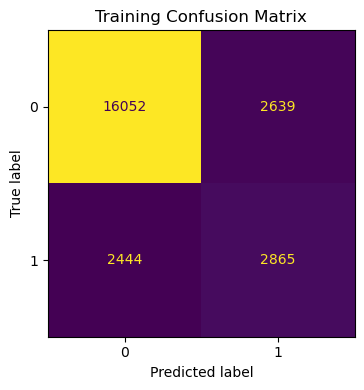

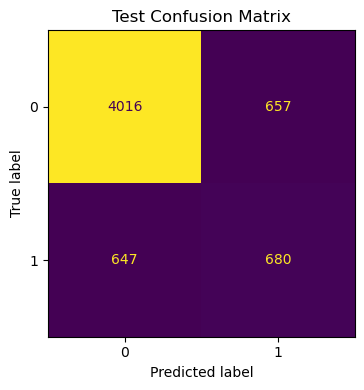

CPU times: user 377 ms, sys: 12.3 ms, total: 389 ms
Wall time: 131 ms


In [15]:
%%time
# Plot and save Training Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 4))
train_cm = confusion_matrix(train_y, train_predictions)
ConfusionMatrixDisplay(train_cm).plot(ax=ax, colorbar=False)
ax.set_title("Training Confusion Matrix")
plt.tight_layout()
plt.savefig('../images/credit-svm/training-cm.png')
plt.show()

# Plot and save Test Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 4))
test_cm = confusion_matrix(test_y, test_predictions)
ConfusionMatrixDisplay(test_cm).plot(ax=ax, colorbar=False)
ax.set_title('Test Confusion Matrix')
plt.tight_layout()
plt.savefig('../images/credit-svm/testing-cm.png')
plt.show()

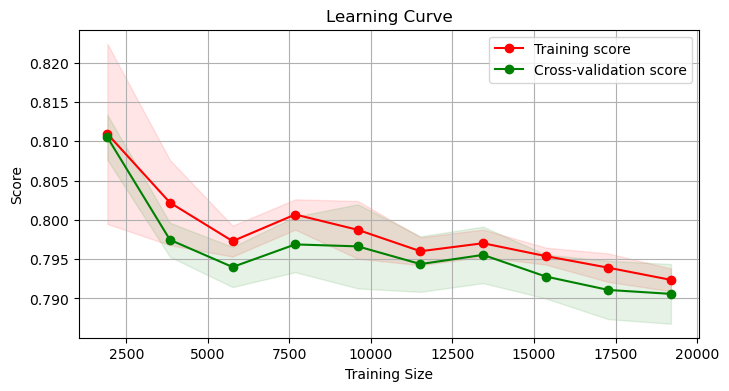

CPU times: user 3min 33s, sys: 1.92 s, total: 3min 35s
Wall time: 3min 36s


In [16]:
%%time
train_sizes, train_scores, test_scores = learning_curve(svm, train_X, train_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('../images/credit-svm/learning-curve-training-size.png')
plt.show()

Shape of train_X: (24000, 23)
Shape of y: (24000,)


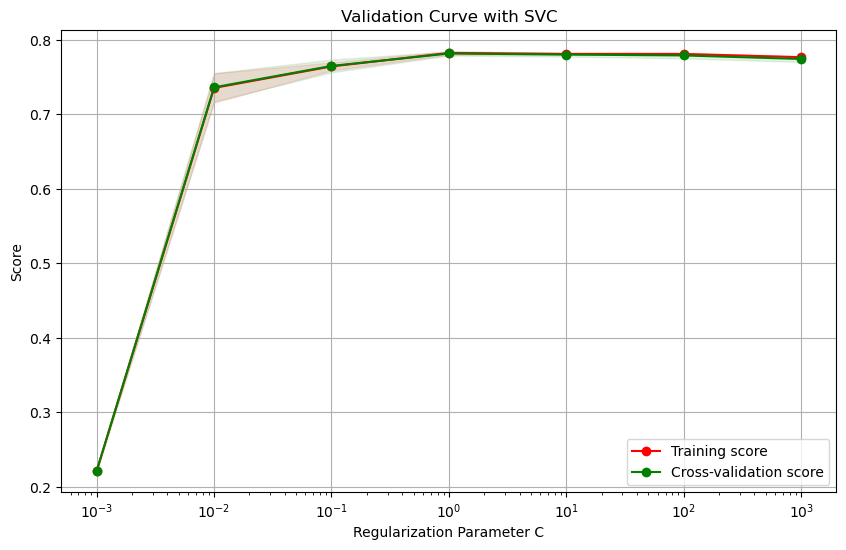

CPU times: user 710 ms, sys: 2.33 s, total: 3.04 s
Wall time: 1min 55s


In [17]:
%%time
# Check the shape of train_X and y
print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of y: {train_y.shape}')

# Ensure train_X and y have the same number of samples
assert train_X.shape[0] == train_y.shape[0], "Mismatch in number of samples between train_X and y"

# Example range for the regularization parameter C
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Compute validation curve
train_scores, test_scores = validation_curve(SVC(gamma='auto', class_weight='balanced'), 
                                             train_X, train_y, 
                                             param_name="C", 
                                             param_range=param_range, 
                                             cv=5, 
                                             scoring='accuracy', 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color='g', label="Cross-validation score")

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Validation Curve with SVC')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Score')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.legend(loc='best')
plt.grid()
plt.savefig('../images/credit-svm/validation-curve-C.png')
plt.show()

In [18]:
%%time
# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm, train_X, train_y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("mean cross-validation score:", cv_scores.mean())

# Write cross-validation scores to a text file
with open('../results/credit-svm/cross_validation_scores.txt', 'w') as file:
    file.write("Cross-validation scores: " + np.array2string(cv_scores) + "\n")
    file.write("Mean cross-validation score: " + str(cv_scores.mean()) + "\n")

Cross-validation scores: [0.78       0.7975     0.81166667 0.77166667 0.77625    0.79208333
 0.79583333 0.78875    0.795      0.79      ]
mean cross-validation score: 0.7898750000000001
CPU times: user 1min 28s, sys: 738 ms, total: 1min 29s
Wall time: 1min 29s


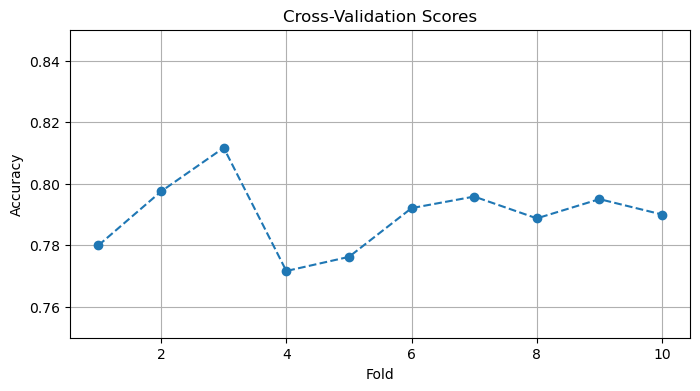

In [19]:
# Plot cross-validation scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.85])
plt.grid(True)
plt.savefig('../images/credit-svm/cross-validation-scores.png')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18691
           1       0.52      0.53      0.53      5309

    accuracy                           0.79     24000
   macro avg       0.70      0.70      0.70     24000
weighted avg       0.79      0.79      0.79     24000



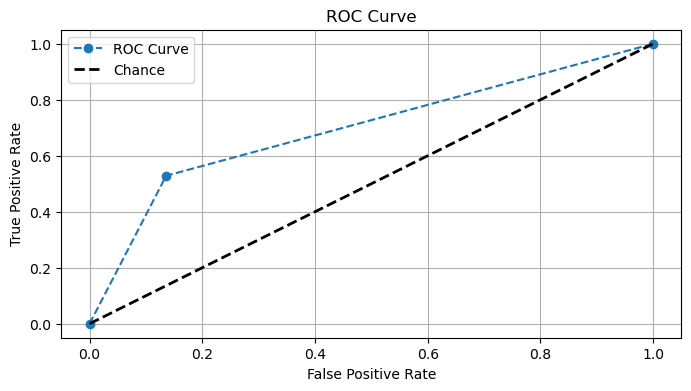

CPU times: user 1min 28s, sys: 697 ms, total: 1min 28s
Wall time: 1min 28s


In [20]:
%%time
y_pred = cross_val_predict(svm, train_X, train_y, cv=10)

report = classification_report(train_y, y_pred)
print(report)

with open('../results/credit-svm/classification_report.txt', 'w') as file:
    file.write(report)
    
fpr, tpr, thresholds = roc_curve(train_y, y_pred, pos_label=1)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, marker='o', linestyle='--', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.savefig('../images/credit-svm/roc-curve-fpr.png')
plt.show()

In [21]:
%%time
# Initialize the SVC
svc = SVC(class_weight='balanced')

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(train_X, train_y)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Write the best parameters and best score to a text file
with open('../results/credit-svm/grid_search_results.txt', 'w') as file:
    file.write("Best parameters found: " + str(grid_search.best_params_) + "\n")
    file.write("Best cross-validation score: " + str(grid_search.best_score_) + "\n")

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=  14.1s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=  13.8s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=  19.6s
[CV] END ...................C=0.001, gamma=auto, kernel=poly; total time=  14.7s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=  14.2s
[CV] END ...............C=0.001, gamma=scale, kernel=sigmoid; total time=  17.6s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=  13.4s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=  19.8s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=  12.0s
[CV] END ...............C=0.001, gamma=scale, kernel=sigmoid; total time=  17.5s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=  13.5s
[CV] END ....................C=0.001, gamma=aut

[CV] END ...................C=1000, gamma=scale, kernel=poly; total time=10.9min


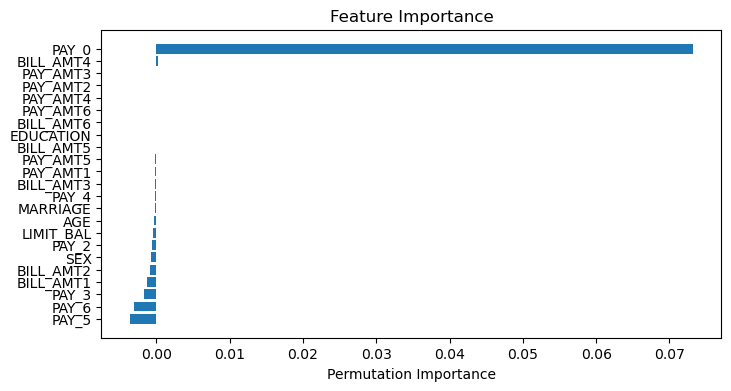

CPU times: user 5min 30s, sys: 1.92 s, total: 5min 32s
Wall time: 5min 34s


In [22]:
%%time
best_svm = grid_search.best_estimator_
best_svm.fit(train_X, train_y)

result = permutation_importance(best_svm, test_X, test_y, n_repeats=10, random_state=42, n_jobs=1)

# Plot feature importance
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(8, 4))
plt.barh(train_X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.savefig('../images/credit-svm/feature-importance.png')
plt.show()

In [23]:
%%time
# Initialize the SVC with the best parameters found by GridSearchCV
best_svc = SVC(C=100, gamma='auto', kernel='poly', class_weight='balanced')

# Fit the SVC on the training data
best_svc.fit(train_X, train_y)

# Generate classification report
test_report = classification_report(test_y, test_predictions, digits=5)

# Generate confusion matrix
test_cm = confusion_matrix(test_y, test_predictions)

# Print to console
print(test_report)
print(test_cm)

# Write to a text file
with open('../results/credit-svm/test_classification_results.txt', 'w') as file:
    file.write("Classification Report:\n")
    file.write(test_report + "\n")
    file.write("Confusion Matrix:\n")
    file.write(np.array2string(test_cm) + "\n")

              precision    recall  f1-score   support

           0    0.86125   0.85941   0.86033      4673
           1    0.50860   0.51243   0.51051      1327

    accuracy                        0.78267      6000
   macro avg    0.68492   0.68592   0.68542      6000
weighted avg    0.78325   0.78267   0.78296      6000

[[4016  657]
 [ 647  680]]
CPU times: user 9.84 s, sys: 1.02 s, total: 10.9 s
Wall time: 9.81 s


In [24]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)

Time taken: in min 33.43528881874997
